# Assignment 2

- **Name**: Pranav Arora
- **Student #**: 202286040
- **Mail**: parora@mun.ca
- **Course**: COMP 6934 Data Visualization

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Defining Color Constants

In [2]:
BLUE_DARKEST = '#051b2c'
BLUE_DARK = '#0c3759'
BLUE_MEDIUM = '#4789be'
BLUE_LIGHT = '#6ebeec'
BLUE_LIGHTEST = '#95cef2'
OCHRE_LIGHT = '#f3e2c0'

### Reading Data from `sleep.csv` file

In [3]:
df = pd.read_csv('sleep.csv')
df

,Age group,Min age,Max age,Not recommended lower,Approriate lower,Recommended lower,Recommended upper,Appropriate upper,Not recommended upper
0,Newborns,0.00,0.33,11,13,14,17,18,19
1,Infants,0.33,1.00,10,11,12,15,16,18
2,Toddlers,1.00,3.00,9,10,11,14,15,16
3,Preschoolers,3.00,6.00,8,9,10,13,14,15
4,School-aged children,6.00,12.00,7,8,9,12,12,12
5,Teenagers,12.00,18.00,7,7,8,10,11,11
6,Young adults,18.00,25.00,6,6,7,9,11,11
7,Adults,25.00,65.00,6,6,7,9,10,10
8,Older adults,65.00,NaN,5,6,7,8,9,9


### Getting statistical insights into the data

In [4]:
df.describe()

,Min age,Max age,Not recommended lower,Approriate lower,Recommended lower,Recommended upper,Appropriate upper,Not recommended upper
count,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,14.481111,16.291250,7.666667,8.444444,9.444444,11.888889,12.888889,13.444444
std,20.847019,21.517004,2.000000,2.505549,2.505549,3.100179,3.018462,3.643869
min,0.000000,0.330000,5.000000,6.000000,7.000000,8.000000,9.000000,9.000000
25%,1.000000,2.500000,6.000000,6.000000,7.000000,9.000000,11.000000,11.000000
50%,6.000000,9.000000,7.000000,8.000000,9.000000,12.000000,12.000000,12.000000
75%,18.000000,19.750000,9.000000,10.000000,11.000000,14.000000,15.000000,16.000000
max,65.000000,65.000000,11.000000,13.000000,14.000000,17.000000,18.000000,19.000000


### Getting to know about the Null values and data types

- `Max Age` contains 1 null value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age group              9 non-null      object 
 1   Min age                9 non-null      float64
 2   Max age                8 non-null      float64
 3   Not recommended lower  9 non-null      int64  
 4   Approriate lower       9 non-null      int64  
 5   Recommended lower      9 non-null      int64  
 6   Recommended upper      9 non-null      int64  
 7   Appropriate upper      9 non-null      int64  
 8   Not recommended upper  9 non-null      int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 780.0+ bytes


## Answer 1

> Constructed group bar plot

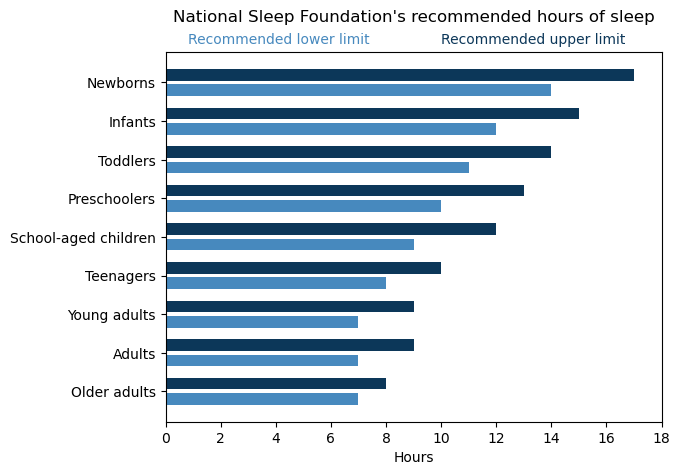

In [6]:
df = df.sort_values(by='Min age', ascending=False)

age_group = df['Age group']
recommended_lower = df['Recommended lower']
recommended_upper = df['Recommended upper']

# Initialized bar_width and bar_gap between the bars
bar_width = 0.3
bar_gap = 0.1

upper_bar_position = np.arange(len(age_group))
lower_bar_position = upper_bar_position + bar_width + bar_gap


fig, ax = plt.subplots()


ax.barh(upper_bar_position, recommended_lower, height=bar_width, label='Recommended Lower limit', color=BLUE_MEDIUM)
ax.barh(lower_bar_position, recommended_upper, height=bar_width, label='Recommended Upper limit', color=BLUE_DARK)

ax.set_xlim(0, 18)
ax.set_xlabel('Hours')
ax.set_yticks((upper_bar_position + lower_bar_position) / 2) # to keep the ticks in the middle of both the bars
ax.set_yticklabels(age_group)
ax.set_title('National Sleep Foundation\'s recommended hours of sleep', pad=22)

# Defining custom legend
ax.text(0.8,9.2,'Recommended lower limit', color=BLUE_MEDIUM)
ax.text(10,9.2,'Recommended upper limit', color=BLUE_DARK)
plt.show()


## Answer 2

> Connected Dot Plot

Text(0.5, 1.0, "National Sleep Foundation's recommended hours of sleep")

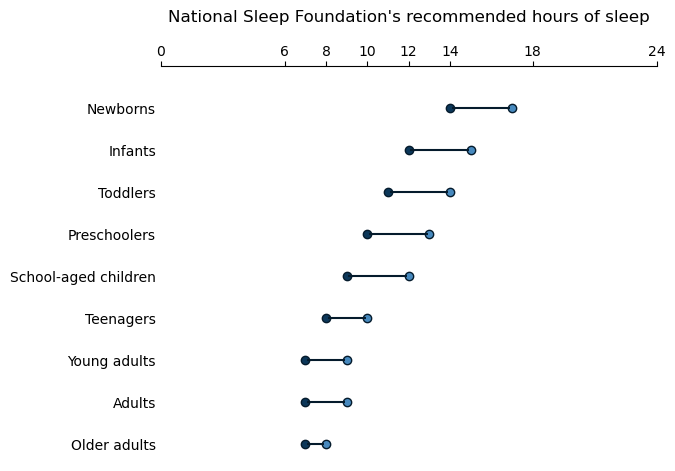

In [7]:
fig, ax = plt.subplots()

# Adjust the lines to the edges of points
ax.hlines(y=age_group, xmin=df['Recommended lower']+0.085, xmax=df['Recommended upper']-0.085, color=BLUE_DARKEST)
ax.scatter(df['Recommended lower'], age_group, color=BLUE_DARK, edgecolors=BLUE_DARKEST, label='Recommended lower')
ax.scatter(df['Recommended upper'], age_group, color=BLUE_MEDIUM, edgecolors=BLUE_DARKEST, label='Recommended upper')

custom_xticks = [0, 6, 8, 10, 12, 14, 18, 24]
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticks)

# Adjustments of spines and tick parameters
ax.spines.bottom.set_position(('data', 9))
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.tick_params(axis='x', which='both', labelrotation=0, direction='in', pad=-15)
ax.tick_params(axis='y', length=0)
ax.set_title('National Sleep Foundation\'s recommended hours of sleep', pad=50)


## Answer 3

> Marimekko Chart

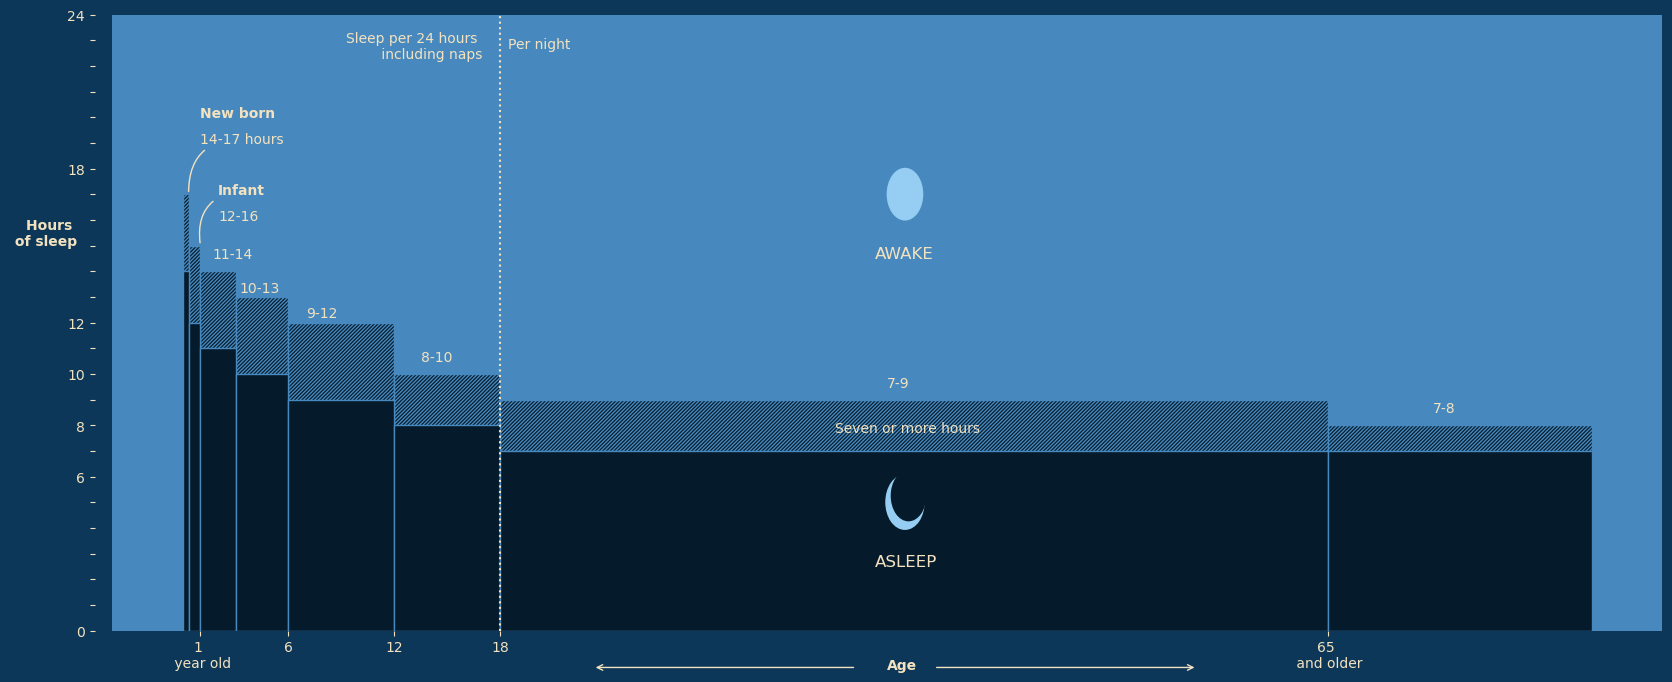

In [8]:
# Sort Values back to ascending order
df = df.sort_values(by='Min age')

# Replace NaN with some value
df['Max age'] = df['Max age'].fillna(80)

# Merging young adults and adults in one group to showcase
df.at[7, 'Min age'] = 18.0


fig, ax = plt.subplots(figsize=(20,8))

# Creating Bar Plots with their specific bin widths

min_age = df['Min age']
max_age = df['Max age']
bin_widths = [max_age[i] - min_age[i] for i in range(len(min_age))]

ax.bar(df['Min age'], df['Recommended upper'], align='edge', width=bin_widths,edgecolor=BLUE_MEDIUM, color=BLUE_DARKEST, hatch="/////////")
ax.bar(df['Min age'], df['Recommended lower'], align='edge',width=bin_widths, edgecolor=BLUE_MEDIUM, color=BLUE_DARKEST)

ax.tick_params(axis='both', colors=OCHRE_LIGHT)

# Adjusting x-y ticks and tick labels

# X-axis

custom_xticks = [1, 6, 12, 18, 65]
custom_xticks_labels = ['1 \n year old', 6, 12, 18, '65 \n and older']
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticks_labels, color=OCHRE_LIGHT)
ax.text(40,-1.5,'Age', color=OCHRE_LIGHT, fontweight='bold')

# Draw arrows across Age
ax.annotate('', xy=(0.53, -0.06), xycoords='axes fraction', xytext=(0.7, -0.06),
arrowprops=dict(arrowstyle="<-", color=OCHRE_LIGHT))
ax.annotate('', xy=(0.48, -0.06), xycoords='axes fraction', xytext=(0.31, -0.06),
arrowprops=dict(arrowstyle="<-", color=OCHRE_LIGHT))

# Y-axis

custom_yticks = [0,'','','','','',6,'', 8,'', 10,'', 12,'','','','','', 18,'','','','','', 24]
ax.set_yticks(np.arange(0, 25), labels=custom_yticks, color=OCHRE_LIGHT)
ax.spines[:].set_visible(False)
ax.text(-6,15,'Hours \n of sleep', color=OCHRE_LIGHT, horizontalalignment='right', fontweight='bold', fontsize='medium')
ax.spines.left.set_position(('data', -5))

# Draw line at age 18
ax.axvline(18.0, color=OCHRE_LIGHT, linestyle=':')


# Icons and Asleep/Awake labels

ax.text(39.3,14.5,'AWAKE', color=OCHRE_LIGHT, fontsize='large')
sun = plt.Circle((41, 17), 1, color=BLUE_LIGHTEST, linewidth=1)
ax.add_patch(sun)

ax.text(39.3,2.5,'ASLEEP', color=OCHRE_LIGHT, fontsize='large')
moon = plt.Circle((41, 5), 1, color=BLUE_LIGHTEST, linewidth=3)
ax.add_patch(moon)
crescent = plt.Circle((41.2, 5.25), 0.97, color=BLUE_DARKEST)
ax.add_patch(crescent)

# Custom texts in the axis area

ax.text(17, 22.3,'Sleep per 24 hours \n including naps', color=OCHRE_LIGHT, fontsize='medium', horizontalalignment='right')
ax.text(22, 22.7,'Per night', color=OCHRE_LIGHT, fontsize='medium', horizontalalignment='right')
ax.text(37, 7.75,'Seven or more hours', color=OCHRE_LIGHT)

# Annotations on each bar

ax.annotate('New born', xy=(0.33,17),xytext=(1,20), fontsize='medium', fontweight='bold', color=OCHRE_LIGHT)
ax.annotate('14-17 hours', xy=(0.33,17),xytext=(1,19), arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=.5',color=OCHRE_LIGHT), fontsize='medium', color=OCHRE_LIGHT)
ax.annotate('Infant', xy=(1,15),xytext=(2,17), arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=.5',color=OCHRE_LIGHT), fontsize='medium', fontweight='bold', color=OCHRE_LIGHT)
ax.annotate('12-16', xy=(1,15),xytext=(2,16), fontsize='medium', color=OCHRE_LIGHT)
ax.annotate('11-14', xy=(3,14),xytext=(1.7,14.5), fontsize='medium', color=OCHRE_LIGHT)
ax.annotate('10-13', xy=(6,13),xytext=(3.2,13.2), fontsize='medium', color=OCHRE_LIGHT)
ax.annotate('9-12', xy=(12,12),xytext=(7,12.2), fontsize='medium', color=OCHRE_LIGHT)
ax.annotate('8-10', xy=(18,10),xytext=(13.5,10.5), fontsize='medium', color=OCHRE_LIGHT)
ax.annotate('7-9', xy=(65,9),xytext=(40,9.5), fontsize='medium', color=OCHRE_LIGHT)
ax.annotate('7-8', xy=(80,8),xytext=(71,8.5), fontsize='medium', color=OCHRE_LIGHT)

# Setting figure and axis background colors

fig.set_facecolor(BLUE_DARK)
ax.set_facecolor(BLUE_MEDIUM)



plt.show()

## Attributions

- Multiple Bar Plots - https://matplotlib.org/2.0.2/examples/api/barchart_demo.html

- Connected Dot Plots - https://python-graph-gallery.com/184-lollipop-plot-with-2-groups/

- Setting edge colors to points - https://www.tutorialspoint.com/how-to-set-the-border-color-of-the-dots-in-matplotlib-s-scatterplots#:~:text=Plot%20the%20x%20and%20y,figure%2C%20use%20show()%20method.

- Adjustment of title padding - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

- Using Matplotlib text() - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

- Adjustment of tick parameters - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

- Axis Vertical Line - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html

- Text alignment - https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html

- Annotation - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

- Fancy Arrow Patch - https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch

- Draw line outside axis - https://www.tutorialspoint.com/how-to-draw-a-line-outside-of-an-axis-in-matplotlib

- Hatch - https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_demo.html

- Circle(Sun, moon, cresent) - https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html

- Axis Patch - https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch